In [2]:
data = read.csv('Econometrics1.1.csv', sep = ';')

In [3]:
data

Observation,Age,Expenditures
<int>,<int>,<int>
1,49,95
2,15,104
3,43,91
4,45,98
5,40,94
6,35,107
7,42,96
8,38,108
9,46,98


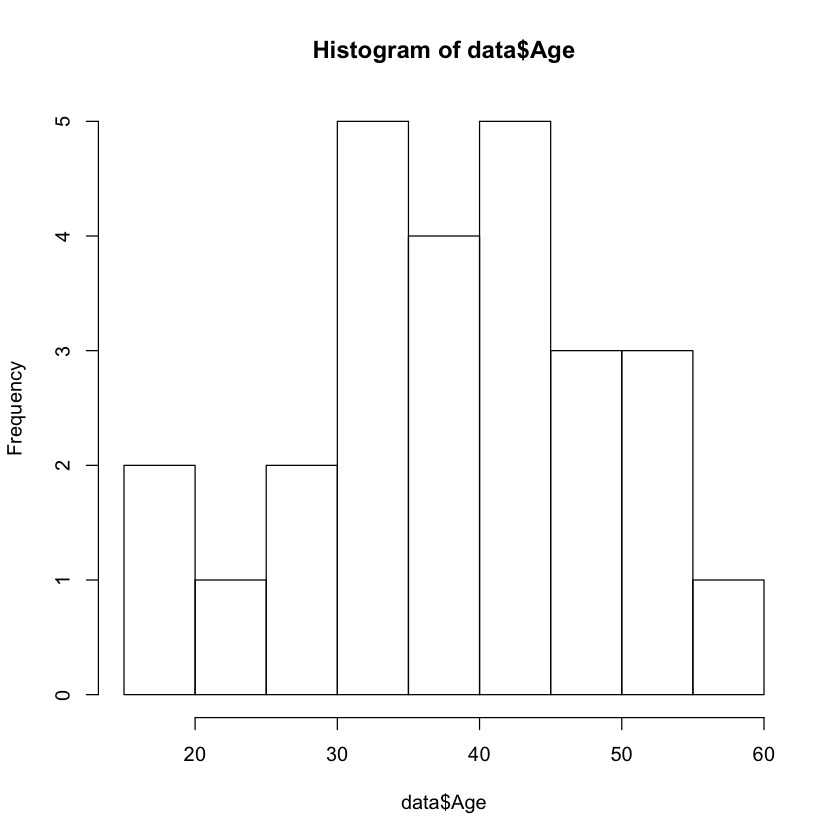

In [4]:
hist(data$Age)

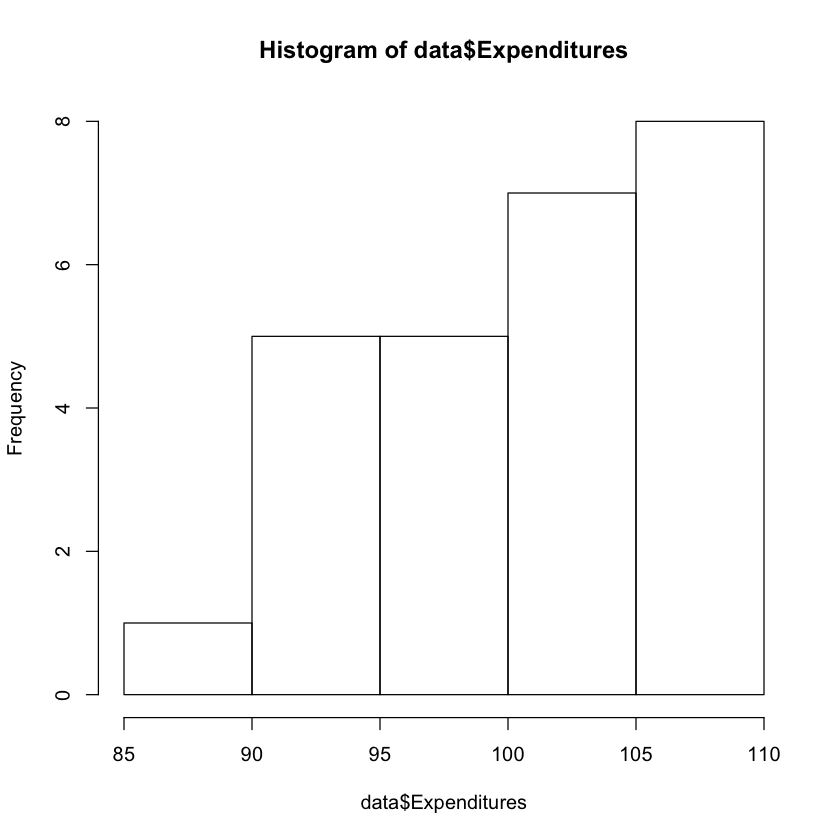

In [5]:
hist(data$Expenditures)

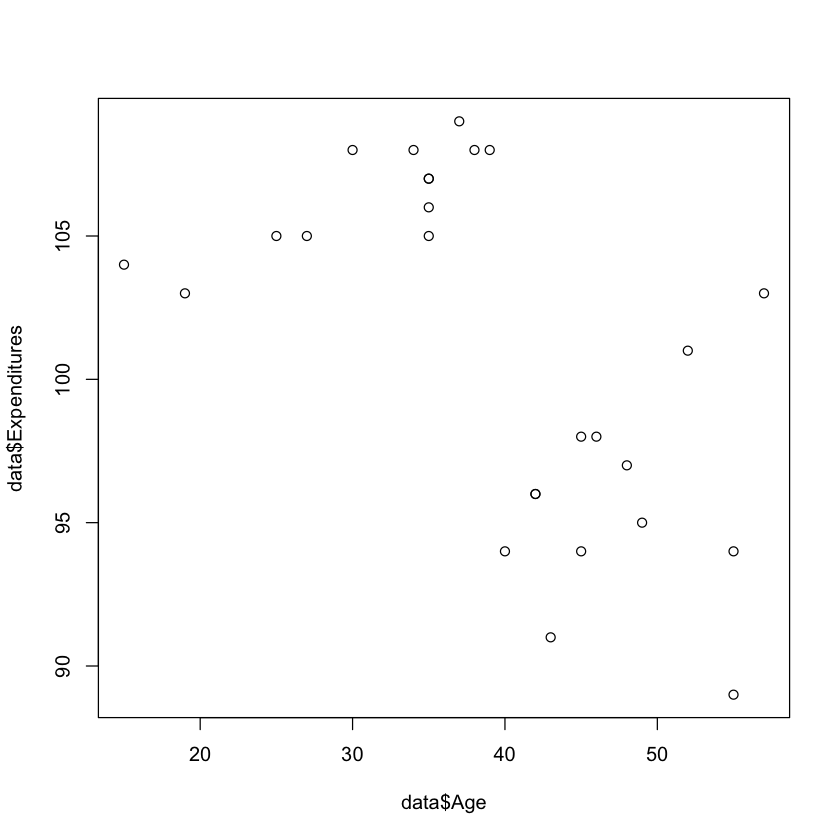

In [6]:
plot(data$Age,data$Expenditures)
#o gráfico é bem diferente do exercício anterior, indicando dois grupos de clientes
#clientes mais novos gastam mais que os mais velhos

In [7]:
mean(data$Expenditures)

[1] 101.1154

In [8]:
older = data$Age >= 40 

In [9]:
older

[1]  TRUE FALSE  TRUE  TRUE  TRUE FALSE  TRUE FALSE  TRUE FALSE  TRUE  TRUE
[13]  TRUE FALSE FALSE FALSE FALSE FALSE  TRUE FALSE  TRUE FALSE  TRUE  TRUE
[25] FALSE FALSE

In [10]:
df_older = data.frame(data$Expenditures, older)
df_older
exp_older = df_older[df_older$older == TRUE,]
exp_older
exp_younger = df_older[df_older$older == FALSE,]
exp_younger

data.Expenditures,older
<int>,<lgl>
95,TRUE
104,FALSE
91,TRUE
98,TRUE
94,TRUE
107,FALSE
96,TRUE
108,FALSE
98,TRUE


,data.Expenditures,older
,<int>,<lgl>
1,95,TRUE
3,91,TRUE
4,98,TRUE
5,94,TRUE
7,96,TRUE
9,98,TRUE
11,101,TRUE
12,89,TRUE
13,96,TRUE


,data.Expenditures,older
,<int>,<lgl>
2,104,FALSE
6,107,FALSE
8,108,FALSE
10,108,FALSE
14,105,FALSE
15,107,FALSE
16,106,FALSE
17,105,FALSE
18,105,FALSE


In [11]:
mean(exp_older$data.Expenditures)
mean(exp_younger$data.Expenditures)

[1] 95.84615

[1] 106.3846

In [16]:
library(ggplot2)
library(tidyverse)
library(ggpubr)

Loading required package: magrittr


Attaching package: ‘magrittr’


The following object is masked from ‘package:purrr’:

    set_names


The following object is masked from ‘package:tidyr’:

    extract




In [14]:
df = cbind(df_older, data$Age)
names(df)[names(df) == "data$Age"] <- "Age"
names(df)[names(df) == "data.Expenditures"] <- "Exp"
df
older_stat = df[df$older == TRUE,]
older_stat
younger_stat = df[df$older == FALSE, ]
younger_stat

Exp,older,Age
<int>,<lgl>,<int>
95,TRUE,49
104,FALSE,15
91,TRUE,43
98,TRUE,45
94,TRUE,40
107,FALSE,35
96,TRUE,42
108,FALSE,38
98,TRUE,46


,Exp,older,Age
,<int>,<lgl>,<int>
1,95,TRUE,49
3,91,TRUE,43
4,98,TRUE,45
5,94,TRUE,40
7,96,TRUE,42
9,98,TRUE,46
11,101,TRUE,52
12,89,TRUE,55
13,96,TRUE,42


,Exp,older,Age
,<int>,<lgl>,<int>
2,104,FALSE,15
6,107,FALSE,35
8,108,FALSE,38
10,108,FALSE,30
14,105,FALSE,25
15,107,FALSE,35
16,106,FALSE,35
17,105,FALSE,35
18,105,FALSE,27


In [23]:
older_graphic = data.frame(older_stat$Age, older_stat$Exp)
names(older_graphic)[names(older_graphic) == "older_stat.Age"] <- "Age"
names(older_graphic)[names(older_graphic) == "older_stat.Exp"] <- "Exp"
older_graphic

Age,Exp
<int>,<int>
49,95
43,91
45,98
40,94
42,96
46,98
52,101
55,89
42,96


In [59]:
linear <- lm(Exp ~ Age, data = older_graphic)
linear #x e y trocados!!


Call:
lm(formula = Exp ~ Age, data = older_graphic)

Coefficients:
(Intercept)          Age  
    88.8719       0.1465  


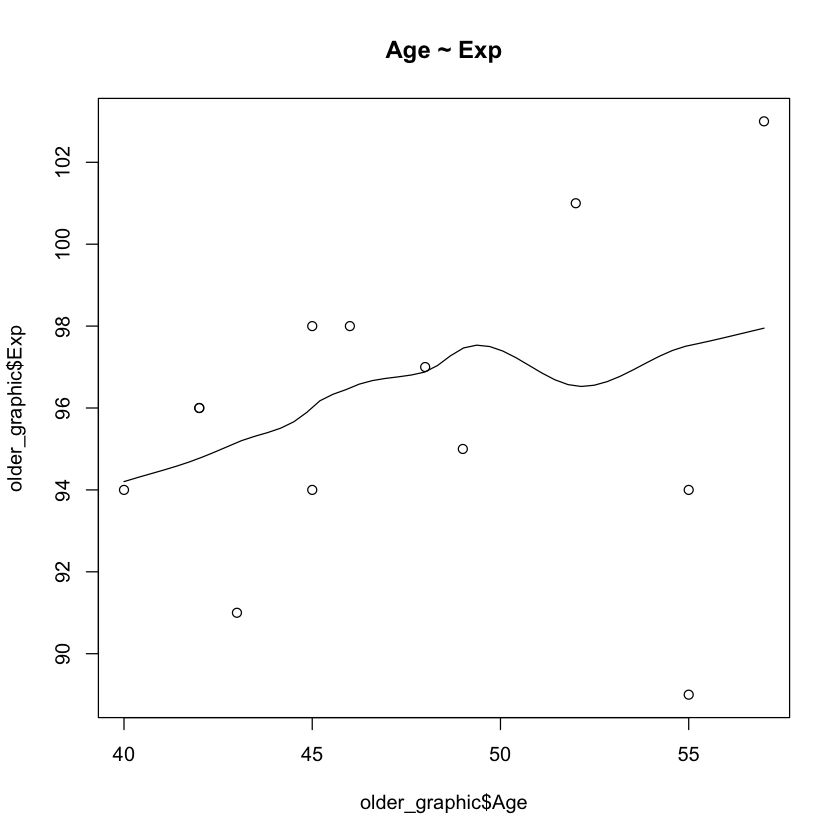

In [60]:
scatter.smooth(x=older_graphic$Age, y=older_graphic$Exp, main="Age ~ Exp") 

In [28]:
younger_graphic = data.frame(younger_stat$Age, younger_stat$Exp)
names(younger_graphic)[names(younger_graphic) == "younger_stat.Age"] <- "Age"
names(younger_graphic)[names(younger_graphic) == "younger_stat.Exp"] <- "Exp"
younger_graphic

Age,Exp
<int>,<int>
15,104
35,107
38,108
30,108
25,105
35,107
35,106
35,105
27,105


In [57]:
linear2 <- lm(Exp ~ Age, data = younger_graphic)
linear2 #x e y trocados!!


Call:
lm(formula = Exp ~ Age, data = younger_graphic)

Coefficients:
(Intercept)          Age  
    100.232        0.198  


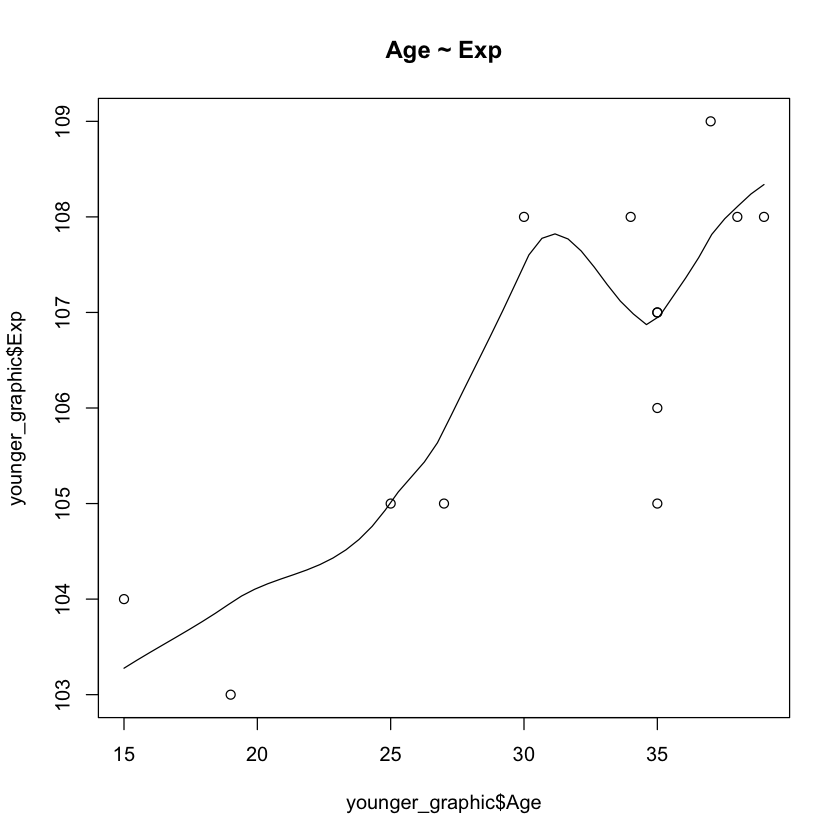

In [30]:
scatter.smooth(x=younger_graphic$Age, y=younger_graphic$Exp, main="Age ~ Exp") 

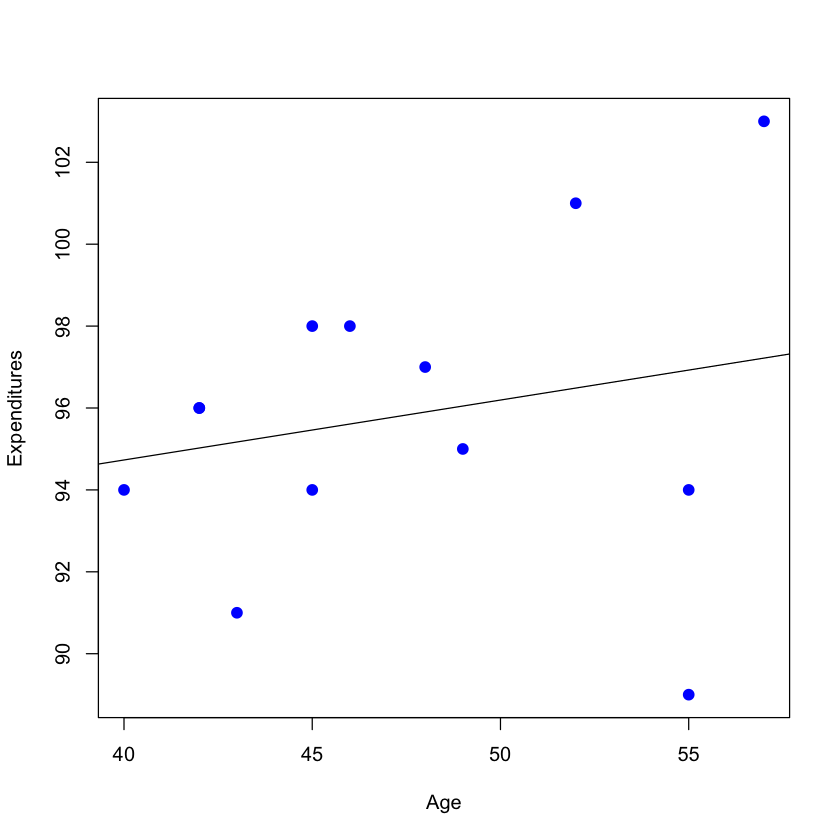

In [55]:
#gráfico pessoas mais velhas
plot(Exp ~ Age, older_graphic, pch = 16, cex = 1.3, col = "blue", xlab = "Age", ylab = "Expenditures")
abline(lm(older_graphic$Exp ~ older_graphic$Age))
#x e y trocados!!


Call:
lm(formula = Exp ~ Age, data = older_graphic)

Coefficients:
(Intercept)          Age  
    88.8719       0.1465  


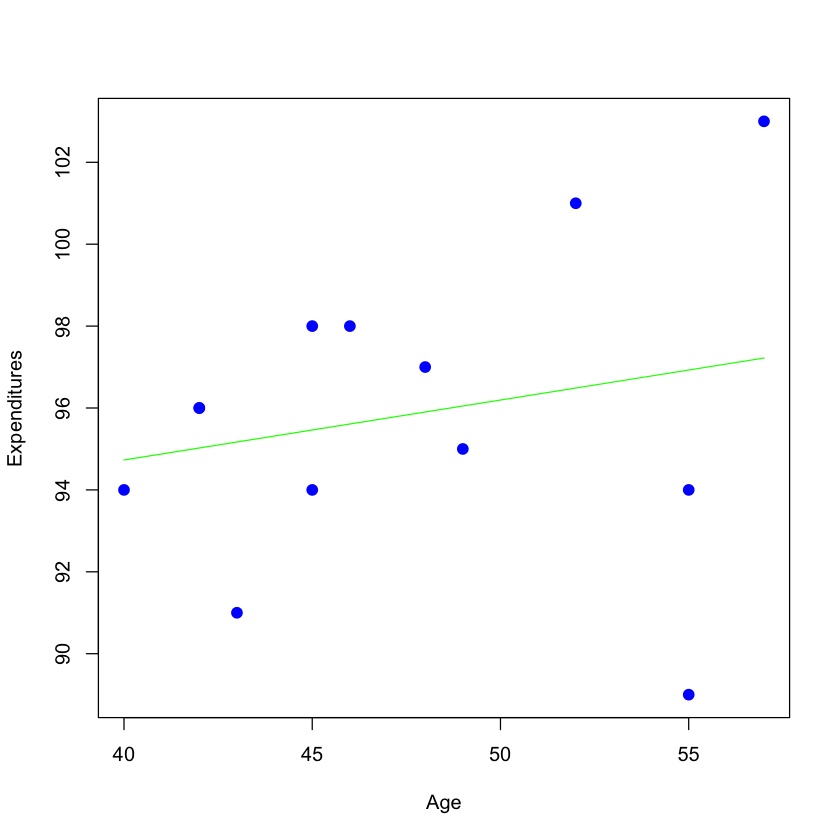

In [69]:
#gráfico pessoas mais velhas
plot(Exp ~ Age, older_graphic, pch = 16, cex = 1.3, col = "blue", xlab = "Age", ylab = "Expenditures")
linear <- lm(Exp ~ Age, data = older_graphic)
linear
lines(older_graphic$Age, predict(linear), col = 'green')#qual é o x e qual é a equação linear para plotar
#x e y trocados!!!

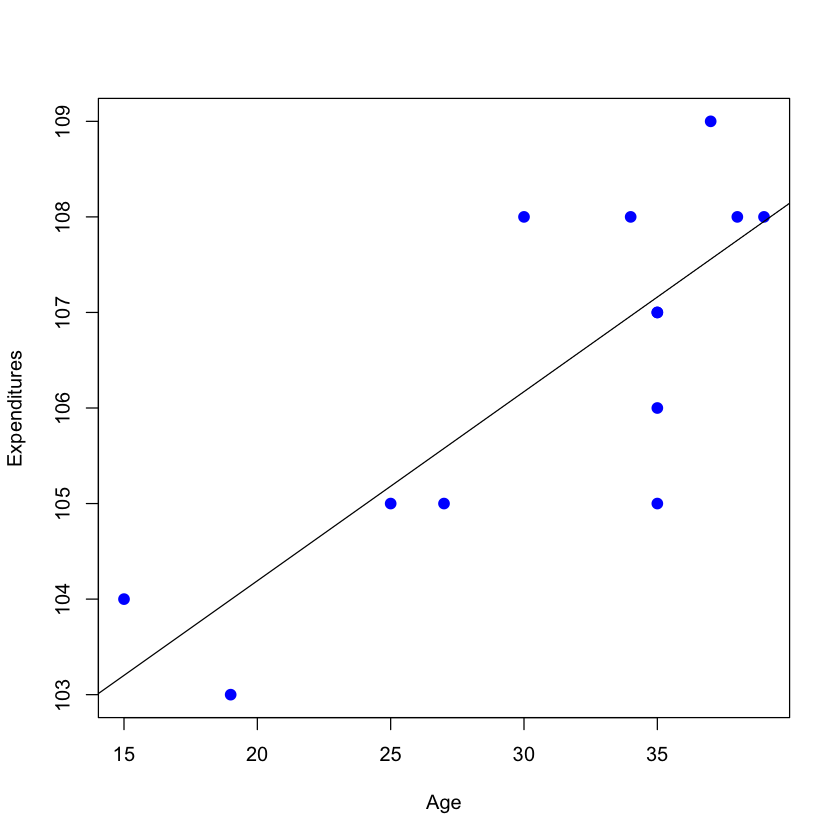

In [65]:
#gráfico pessoas mais novas
plot(Exp ~ Age, younger_graphic, pch = 16, cex = 1.3, col = "blue", xlab = "Age", ylab = "Expenditures")
abline(lm(younger_graphic$Exp ~ younger_graphic$Age))
#plotar regressão linear


Call:
lm(formula = Exp ~ Age, data = younger_graphic)

Coefficients:
(Intercept)          Age  
    100.232        0.198  


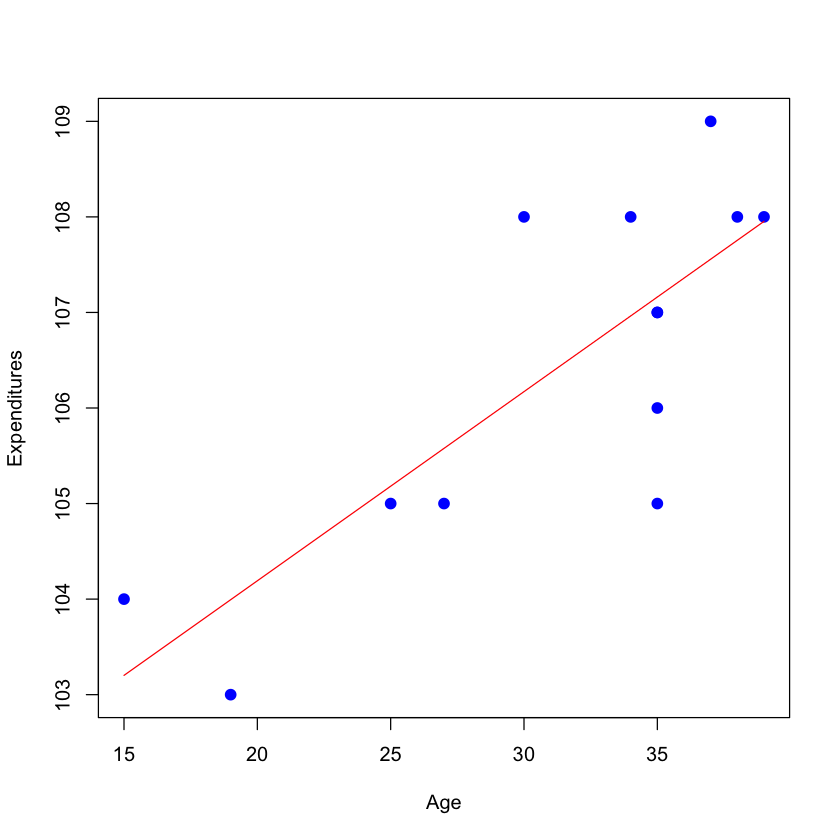

In [67]:
#gráfico pessoas mais novas
plot(Exp ~ Age, younger_graphic, pch = 16, cex = 1.3, col = "blue", xlab = "Age", ylab = "Expenditures")
linear2 <- lm(Exp ~ Age, data = younger_graphic)
linear2
lines(younger_graphic$Age, predict(linear2), col = 'red')
#predict model

In [61]:
#50 yo model:
fifty_pred = 88.8719  + 50*0.1465
fifty_pred
#25 yo model:
twenty_pred = 100.232 + 0.198*25
twenty_pred

[1] 96.1969

[1] 105.182

In [62]:
summary(linear)#p-value mostra que o modelo é ruim
summary(linear2)#p-value mostra que o modleo é bom


Call:
lm(formula = Exp ~ Age, data = older_graphic)

Residuals:
    Min      1Q  Median      3Q     Max 
-7.9278 -1.4631  0.9763  2.3905  5.7793 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  88.8719     9.4585   9.396 1.37e-06 ***
Age           0.1465     0.1974   0.742    0.474    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 3.833 on 11 degrees of freedom
Multiple R-squared:  0.04767,	Adjusted R-squared:  -0.0389 
F-statistic: 0.5507 on 1 and 11 DF,  p-value: 0.4736



Call:
lm(formula = Exp ~ Age, data = younger_graphic)

Residuals:
    Min      1Q  Median      3Q     Max 
-2.1613 -0.5775 -0.1613  0.7982  1.8286 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 100.23228    1.41590   70.79 5.55e-16 ***
Age           0.19797    0.04438    4.46 0.000962 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.153 on 11 degrees of freedom
Multiple R-squared:  0.644,	Adjusted R-squared:  0.6116 
F-statistic:  19.9 on 1 and 11 DF,  p-value: 0.0009619
